# **Conservatory Group**
# **Project Title: Effects of COVID-19 on Retail Sales and E-Commerce in the US**

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [42]:
file = r"C:\Users\lenpk\OneDrive\Desktop\useful_data\retail_grocery.csv"

In [43]:
retail_grocery = pd.read_csv(file)
retail_grocery.head()

,DATE,RSGCS_20200814,RSGCS_20200916
0,2010-01-01,43028,43028
1,2010-02-01,43735,43735
2,2010-03-01,43304,43304
3,2010-04-01,43186,43186
4,2010-05-01,43266,43266


In [44]:
retail_grocery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   DATE            128 non-null    object
 1   RSGCS_20200814  128 non-null    object
 2   RSGCS_20200916  128 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 3.1+ KB


In [45]:
retail_grocery_sept = retail_grocery.drop(['RSGCS_20200814'], axis = 1)
retail_grocery_sept.head()

,DATE,RSGCS_20200916
0,2010-01-01,43028
1,2010-02-01,43735
2,2010-03-01,43304
3,2010-04-01,43186
4,2010-05-01,43266


In [46]:
retail_grocery_sept['RSGCS_20200916'] = retail_grocery_sept['RSGCS_20200916'].astype(int)

retail_grocery_sept['DATE'] = pd.to_datetime(retail_grocery_sept['DATE'])

In [47]:
retail_grocery_sept.rename(columns = {'RSGCS_20200916':'Amount'}, inplace=True)

In [48]:
retail_grocery_sept.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    128 non-null    datetime64[ns]
 1   Amount  128 non-null    int32         
dtypes: datetime64[ns](1), int32(1)
memory usage: 1.6 KB


In [49]:
retail_grocery_sept.tail()

,DATE,Amount
123,2020-04-01,63869
124,2020-05-01,64667
125,2020-06-01,63454
126,2020-07-01,63916
127,2020-08-01,62905


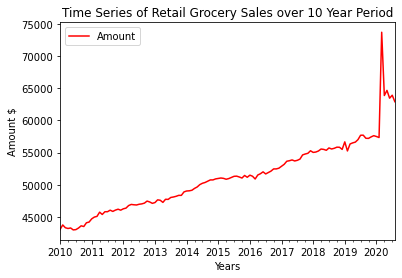

In [50]:
retail_grocery_sept.plot(x='DATE', y='Amount', color='r')
plt.xlabel('Years')
plt.ylabel('Amount $')
plt.title('Time Series of Retail Grocery Sales over 10 Year Period')
plt.show()

**Retail grocery Y2020**

In [77]:
# select 2020 data
retail_grocery_y20 = retail_grocery_sept.loc[120:]
retail_grocery_y20

,DATE,Amount
120,2020-01-01,57495
121,2020-02-01,57337
122,2020-03-01,73714
123,2020-04-01,63869
124,2020-05-01,64667
125,2020-06-01,63454
126,2020-07-01,63916
127,2020-08-01,62905


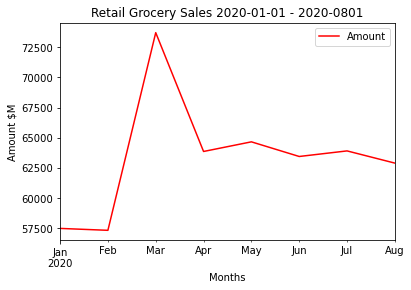

In [78]:
retail_grocery_y20.plot(x='DATE', y='Amount', color='r')
plt.xlabel('Months')
plt.ylabel('Amount $M')
plt.title('Retail Grocery Sales 2020-01-01 - 2020-0801')
plt.show()

**E-Grocery Sales**


**Source:** Brick Meets Clicks (BMC)/Mercatus Grocery Shopping Survey 

In [71]:
# e-grocery March, April, May, June, and August
labels = ['Mar', 'Apr', 'May', 'Jun', 'Aug'] 
Amount= [4000, 5300, 6600, 7200, 5700]


e_grocery_2020 = pd.DataFrame({'DATE': labels,
                              'Amount': Amount})
e_grocery_2020

,DATE,Amount
0,Mar,4000
1,Apr,5300
2,May,6600
3,Jun,7200
4,Aug,5700


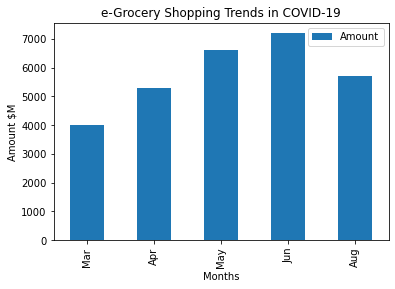

In [72]:
e_grocery_2020.plot(kind='bar', x='DATE', y='Amount')
plt.xlabel('Months')
plt.ylabel('Amount $M')
plt.title('e-Grocery Shopping Trends in COVID-19')
plt.show()

**Retail Grocery Sales vs e-Grocery Sales**

**Note:** Comparison is done between the same corresponding month in each data set due to the limitations of obtaining data for the months of January, February and July.

In [110]:
# Extract retail grocery data corresponding to the months in e-grocery_2020
rem_months = retail_grocery_y20[(retail_grocery_y20['DATE']=='2020-01-01') |\
                                                                  (retail_grocery_y20['DATE']=='2020-02-01') |\
                                                                  (retail_grocery_y20['DATE']=='2020-07-01')].index
retail_grocery_covid = retail_grocery_y20.drop(rem_months).reset_index(drop = True)

In [121]:
retail_covid_months = retail_grocery_covid.drop(['DATE'], axis = 1)
retail_covid_months['Months'] = [label for label in labels]
retail_covid_months

,Amount,Months
0,73714,Mar
1,63869,Apr
2,64667,May
3,63454,Jun
4,62905,Aug


KeyError: 'DATE'

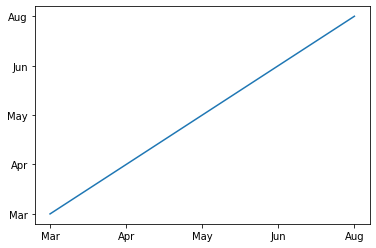

In [116]:
plt.plot(e_grocery_2020['DATE'], e_grocery_2020['DATE'])
plt.plot(retail_grocery_mnths['DATE'], retail_grocery_mnths['Amount'])
plt.show()